In [14]:
import pandas as pd # data processing
import numpy as np # working with arrays
import matplotlib.pyplot as plt # visualization
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint,History
import pickle
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score,classification_report,precision_score, recall_score
from sklearn.metrics import f1_score, matthews_corrcoef,confusion_matrix

In [15]:
def load_data(data_url):
    print("Loading data ...",end=" ")
    df = pd.read_excel(data_url)
    df.drop(['V7_day','V6_day'], axis=1, inplace=True)
    X = df.drop("CLASS", axis=1)
    y = df["CLASS"]
    X = X.values
    y = y.values
    print('\033[32m \u2713 \033[0m')
    return X,y

def split_data(X,y):
    print("Split data ...",end=" ")
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    print('\033[32m \u2713 \033[0m')
    return X_train, X_test, y_train, y_test

def save_model(model,name):
    print("Saving "+name+" model ...",end=" ")
    pickle.dump(model, open("./models/"+name+".pkl","wb"))
    print('\033[32m \u2713 \033[0m')

def print_metrics(y_test,y_pred):
    n_errors = (y_pred != y_test).sum()
    #print("The model used is Decision Tree  classifier")

    acc = accuracy_score(y_test, y_pred)
    print("The accuracy is {}".format(acc))
    
    prec = precision_score(y_test, y_pred)
    print("The precision is {}".format(prec))
    
    rec = recall_score(y_test, y_pred)
    print("The recall is {}".format(rec))
    
    f1 = f1_score(y_test, y_pred)
    print("The F1-Score is {}".format(f1))

def confusion_matr(y_test,y_pred):
    # printing the confusion matrix
    LABELS = ['Normal', 'Fraud']
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize =(8, 4))
    sns.heatmap(conf_matrix, xticklabels = LABELS,yticklabels = LABELS, annot = True, fmt ="d")
    plt.title("Confusion matrix")
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()

def d_tree(X_train, X_test, y_train, y_test):
    print("Creating DT model ...",end=" ")
    clf = DecisionTreeClassifier()
    clf.fit(X_train, y_train)
    print('\033[32m \u2713 \033[0m')

    y_pred = clf.predict(X_test)
    print_metrics(y_test,y_pred)
    confusion_matr(y_test,y_pred)

    return clf

def r_forest(X_train, X_test, y_train, y_test):
    print("Creating RF model ...",end=" ")
    rfc = RandomForestClassifier()
    rfc.fit(X_train, y_train)
    print('\033[32m \u2713 \033[0m')

    y_pred = rfc.predict(X_test)
    print_metrics(y_test,y_pred)
    confusion_matr(y_test,y_pred)
    
    return rfc

def ex_tree(X_train, X_test, y_train, y_test):
    print("Creating Extra_T model ...",end=" ")
    etc = ExtraTreesClassifier(n_estimators=100, max_depth=4)
    etc.fit(X_train, y_train)
    print('\033[32m \u2713 \033[0m')
    y_pred = etc.predict(X_test)
    print_metrics(y_test,y_pred)
    confusion_matr(y_test,y_pred)
    return etc


In [23]:
def cnn_md(X,y):
    y = tf.keras.utils.to_categorical(y)
    X_train, X_test, y_train, y_test = split_data(X,y)

    print("Creating CNN model ...",end=" ")
    # Define the CNN model
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Reshape((X.shape[1], 1), input_shape=(X.shape[1],)))
    model.add(tf.keras.layers.Conv1D(32, 3, activation='relu'))
    model.add(tf.keras.layers.MaxPooling1D(2))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(64, activation='relu'))
    model.add(tf.keras.layers.Dense(2, activation='softmax'))
    print('\033[32m \u2713 \033[0m')  

    # Compile the model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    history= History()
    
    print("Training step ...")
    # Train the model
    history= model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))
    print('\033[32m \u2713 \033[0m')  

    # Evaluate the model on the test data
    test_loss, test_accuracy = model.evaluate(X_test, y_test)
    print("Test Accuracy:", test_accuracy)

    # Make predictions on the test data
    # y_pred = model.predict(X_test)
    # confusion_matr(y_test,y_pred)

    return history,model

def ensemble_learning(X_train, X_test, y_train, y_test,mds):
    dt,df=mds
    # Combine the models into an ensemble
    ensemble_clf = VotingClassifier(estimators=[("dt", dt), ("rf", rd)], voting='hard')
    ensemble_clf.fit(X_train, y_train)
    y_pred = ensemble_clf.predict(X_test)


In [20]:
data_url='C:/Users/KABYADE/Desktop/Fraud_ML/dataset/preprocessing_data.xlsx'
X,y=load_data(data_url)
X_train, X_test, y_train, y_test=split_data(X,y)
X_train.shape,X_test.shape

Loading data ...  ✓ 
Split data ...  ✓ 


((112523, 26), (28131, 26))

In [24]:
cnn=cnn_md(X,y)

Split data ...  ✓ 
Creating CNN model ...  ✓ 
Training step ...
Epoch 1/5
3517/3517 [==============================] - 31s 8ms/step - loss: 432.9403 - accuracy: 0.5956 - val_loss: 178.9382 - val_accuracy: 0.6531
Epoch 2/5
3517/3517 [==============================] - 18s 5ms/step - loss: 57.3776 - accuracy: 0.6023 - val_loss: 22.5265 - val_accuracy: 0.6572
Epoch 3/5
3517/3517 [==============================] - 20s 6ms/step - loss: 3.2127 - accuracy: 0.6074 - val_loss: 0.6047 - val_accuracy: 0.6589
Epoch 4/5
3517/3517 [==============================] - 14s 4ms/step - loss: 0.6064 - accuracy: 0.6625 - val_loss: 0.6071 - val_accuracy: 0.6543
Epoch 5/5
3517/3517 [==============================] - 18s 5ms/step - loss: 0.6452 - accuracy: 0.6005 - val_loss: 0.6684 - val_accuracy: 0.5474
 ✓ 
880/880 [==============================] - 3s 3ms/step - loss: 0.6684 - accuracy: 0.5474
Test Accuracy: 0.5474032163619995


Creating DT model ...  ✓ 
The accuracy is 0.9437986562866588
The precision is 0.937214371089081
The recall is 0.950920245398773
The F1-Score is 0.9440175631174532


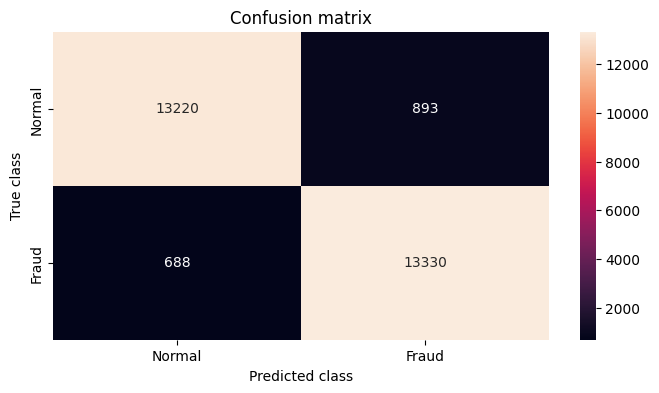

In [38]:
#Decision_Tree
dt=d_tree(X_train, X_test, y_train, y_test)

Creating RF model ...  ✓ 
The accuracy is 0.971454978493477
The precision is 0.9965431727662133
The recall is 0.9459980025681267
The F1-Score is 0.9706129917657823


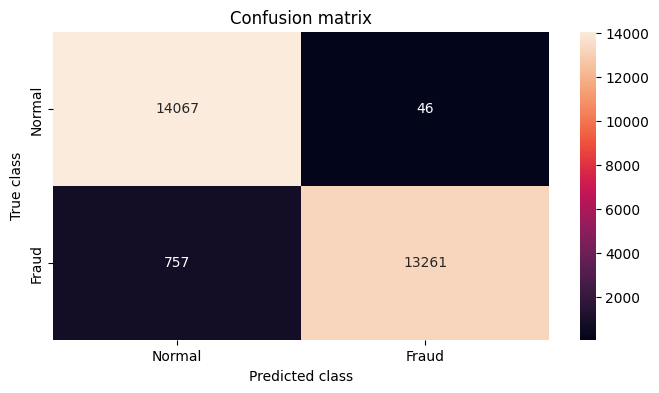

In [26]:
rd=r_forest(X_train, X_test, y_train, y_test)

In [28]:
save_model(rd,"R_forest")

Saving R_forest model ...  ✓ 


In [33]:
test_data=[  4,  2,  23,  1,  410878,  715848.0,  19,  2976,  44,  20339,  3,  1,  621524,  1,  
             384,  4,  0.654861,  0.654861, -1.0, -0.5,  0.959493, -0.978148,  2009,  2011,  2009,  2009 
           ]
to_predict = np.array(test_data).reshape(1,26)

rf_model = pickle.load(open("models/R_forest.pkl","rb"))
rf_model.predict(to_predict) 

array([0], dtype=int64)